In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error, mean_squared_error, r2_score, roc_auc_score, cohen_kappa_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('C:/Users/NEIST/Desktop/Pre/main_datasets/MI_dataset_100.csv')
data

,BCUTv-1l,BCUTi-1h,BCUTp-1l,BCUTZ-1l,BCUTd-1h,BCUTare-1l,BCUTs-1l,BCUTse-1l,BCUTpe-1l,PEOE_VSA9,...,piPC4,ETA_dEpsilon_D,GATS1se,SRW09,SMR_VSA6,AATS1i,MDEC-22,VR1_DzZ,VR3_Dzpe,target
0,14.701776,14.557741,0.744080,5.748825,3.218349,2.238180,1.240005,2.479451,2.284833,12.710848,...,4.754667,0.492929,0.839738,6.580639,6.606882,151.382734,2.249577,74.441211,4.780763,1
1,14.700550,13.644287,0.741446,5.679853,3.258335,2.178923,1.143745,2.424758,2.228722,39.958147,...,5.547129,0.364441,0.878124,7.412764,34.729217,144.347348,3.452842,200.587788,6.399368,1
2,13.304117,17.424774,0.545839,5.666628,3.296716,2.162280,1.195097,2.406729,2.211106,30.297854,...,5.873877,0.391712,0.714820,6.555357,25.161346,145.867240,8.909374,264.575821,6.887221,1
3,13.304118,17.424774,0.545842,5.666628,3.296579,2.162280,1.195097,2.406729,2.211106,30.297854,...,5.845354,0.391628,0.728963,6.293419,31.706102,145.969189,11.311909,255.023211,6.823125,1
4,13.304116,17.424774,0.545837,5.666628,3.296716,2.162280,1.195097,2.406729,2.211106,36.842611,...,5.873877,0.394348,0.752570,6.555357,31.768228,146.451896,7.129081,264.364066,6.886408,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2353,13.304122,17.424767,0.546071,5.883844,4.032418,1.994006,0.291268,2.424025,2.114058,0.000000,...,2.564949,0.891262,1.334922,0.000000,0.000000,157.070869,0.000000,27.188622,3.195376,0
2354,14.705903,14.565372,0.775868,5.762599,3.267801,2.247387,1.220651,2.485813,2.292618,13.437118,...,5.125079,0.586268,1.090520,6.842683,26.057229,155.863963,3.950551,96.533105,5.212012,0
2355,15.584269,14.558553,0.996165,5.671568,3.309310,2.167403,1.257100,2.411225,2.216060,17.360722,...,5.541509,0.437346,1.043889,6.861711,5.733667,149.161023,5.171982,94.305802,5.134497,1
2356,14.702534,14.565388,0.748758,5.756853,3.269475,2.240717,1.419059,2.478957,2.285506,12.934202,...,5.188433,0.624077,1.035548,6.842683,12.340549,158.114543,4.832410,75.087040,4.788936,0


In [3]:
df = pd.DataFrame(data)

In [4]:
from sklearn import preprocessing
Label = preprocessing.LabelEncoder()
target = Label.fit_transform(data['target'])
target

array([1, 1, 1, ..., 1, 0, 0], dtype=int64)

In [5]:
y = df.target.values
x_data = df.drop(['target'], axis = 1)

In [6]:
# Normalize
x = (x_data - np.min(x_data)) / (np.max(x_data) - np.min(x_data)).values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2,random_state=1)

In [8]:
#x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size = 0.10,random_state=0)

In [9]:
#transpose matrices
x_train = x_train.T
y_train = y_train.T
x_test = x_test.T
y_test = y_test.T
#x_val = x_val.T
#y_val = y_val.T

## ANN using MLP model

In [10]:
from sklearn.neural_network import MLPClassifier
MLP = MLPClassifier(hidden_layer_sizes=(10,10,10), max_iter=100)
MLP.fit(x_train.T, y_train.T)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=100)

In [11]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator=MLP, X=x_train.T, y=y_train.T, cv=10)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multi

In [12]:
print(accuracies)
print(accuracies.mean())

[0.77248677 0.78306878 0.84126984 0.83597884 0.81481481 0.7989418
 0.82446809 0.79787234 0.79255319 0.75531915]
0.8016773612518294


In [13]:
predictions = MLP.predict(x_test.T)
acc = MLP.score(x_test.T,y_test.T)*100
predictions_tr = MLP.predict(x_train.T)
#predictions_val = MLP.predict(x_val.T)
acc = MLP.score(x_test.T,y_test.T)*100
acc_tr =MLP.score(x_train.T,y_train.T)*100
#acc_val =MLP.score(x_val.T,y_val.T)*100
print(acc)
print(acc_tr)
#print(acc_val)

84.32203389830508
80.22269353128314


In [14]:
from sklearn.metrics import matthews_corrcoef
matthews_corrcoef(y_test, predictions) 

0.5464393232204273

In [15]:
#from sklearn.metrics import matthews_corrcoef
#matthews_corrcoef(y_val, predictions_val)

In [16]:
cf =(confusion_matrix(y_test, predictions))
#cf_val =(confusion_matrix(y_val, predictions_val))
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test, predictions))
#print(confusion_matrix(y_train, predictions_tr))
#print(classification_report(y_train, predictions_tr))
#print(confusion_matrix(y_val, predictions_val))
#print(classification_report(y_val, predictions_val))

[[ 64  52]
 [ 22 334]]
              precision    recall  f1-score   support

           0       0.74      0.55      0.63       116
           1       0.87      0.94      0.90       356

    accuracy                           0.84       472
   macro avg       0.80      0.74      0.77       472
weighted avg       0.84      0.84      0.83       472



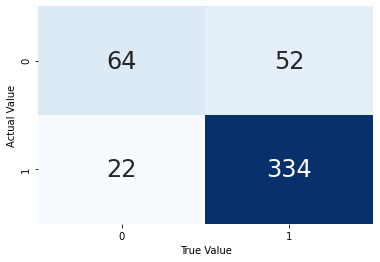

In [17]:
cf_plt =sns.heatmap(cf,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
cf_plt.set(xlabel = "True Value", ylabel ="Actual Value")
cf_plt

In [18]:
#cf_plt =sns.heatmap(cf_val,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
#cf_plt.set(xlabel = "True Value", ylabel ="Actual Value")
#cf_plt

In [19]:
#parameters
r_auc_score = roc_auc_score(y_test, predictions)
print('AUC = %0.3f)' % r_auc_score)
rsquare = r2_score(y_test, predictions)
print('R2 = %0.3f)' % rsquare)
#mae = mean_absolute_error(y_test, predictions)
#print('MAE = %0.3f)' % mae)
mse = mean_squared_error(y_test, predictions)
print('MSE = %0.3f)' % mse)
mbe = np.mean(predictions - y_test)
print('MBE = %0.3f)'% mbe)
rmse = mse** (1/2)
print('RMSE = %0.3f)' % rmse)
variance = np.var(predictions)
print('Variance = %0.3f)'% variance)
sse = np.mean((np.mean(predictions) - y)** 2)
bias = sse - variance
print('Bias = %0.3f)'% bias)
kappa = cohen_kappa_score(y_test, predictions)
print('Kappa = %0.3f)'% kappa)

AUC = 0.745)
R2 = 0.154)
MSE = 0.157)
MBE = 0.064)
RMSE = 0.396)
Variance = 0.149)
Bias = 0.061)
Kappa = 0.537)


In [20]:
#fall out
FP = cf.sum(axis=0) - np.diag(cf) 
FN = cf.sum(axis=1) - np.diag(cf)
TP = np.diag(cf)
TN = cf.sum() - (FP + FN + TP)
FP = FP.astype(float)
FN = FN.astype(float)
TP = TP.astype(float)
TN = TN.astype(float)
# Sensitivity, hit rate, recall, or true positive rate
#TPR = TP/(TP+FN)
# Specificity or true negative rate
#TNR = TN/(TN+FP) 
# Precision or positive predictive value
#PPV = TP/(TP+FP)
# Negative predictive value
#NPV = TN/(TN+FN)
# Fall out or false positive rate
FPR = FP/(FP+TN)
# False negative rate
FNR = FN/(TP+FN)
# False discovery rate
FDR = FP/(TP+FP)
# Overall accuracy for each class
#ACC = (TP+TN)/(TP+FP+FN+TN)
print(FPR)
print(FNR)
print(FDR)

[0.06179775 0.44827586]
[0.44827586 0.06179775]
[0.25581395 0.13471503]


In [21]:
print("complete")

complete
